In [29]:
SUV<-read.csv('SouvenirSales.csv')
suv<-ts(SUV$Sales, frequency=12, start=c(1995,1))

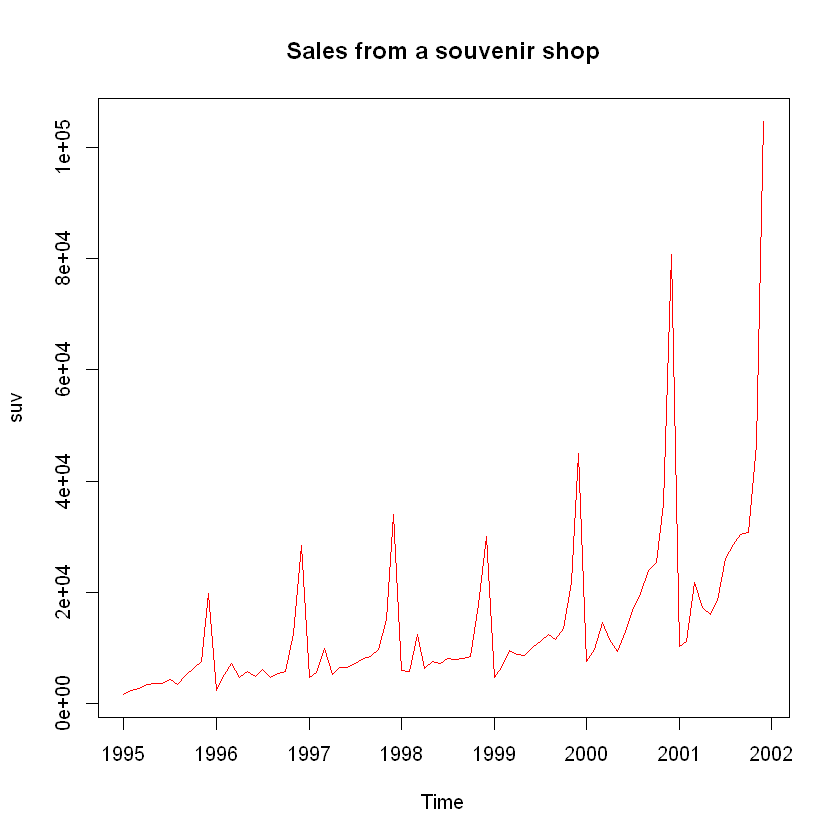

In [30]:
plot(suv, col='red', main='Sales from a souvenir shop')

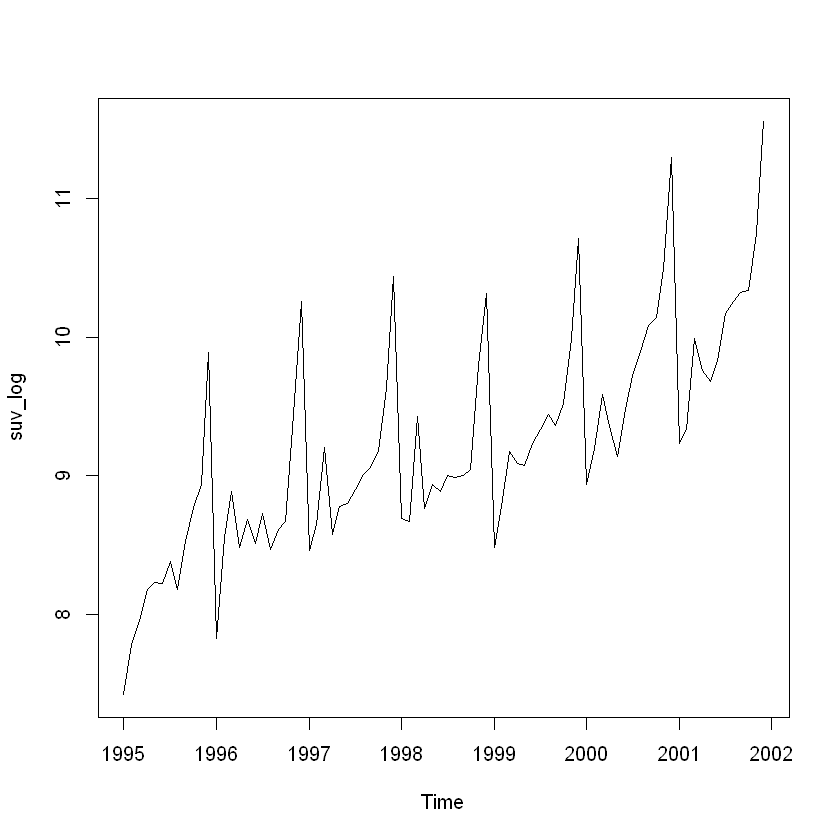

In [31]:
suv_log=log(suv)
plot(suv_log)

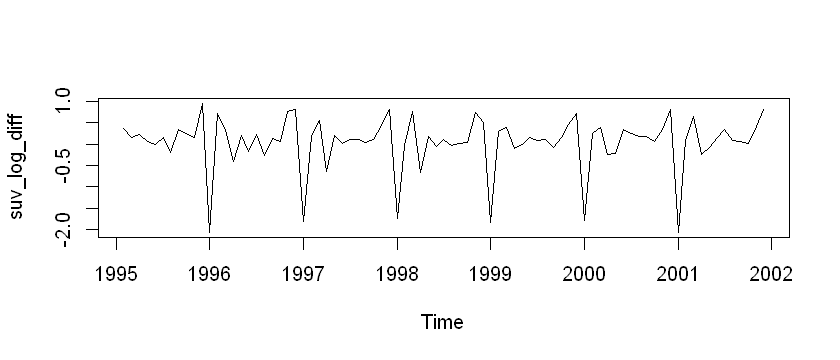

In [32]:
options(repr.plot.width=7, repr.plot.height=3)
suv_log_diff=diff(suv_log)
plot(suv_log_diff)

Let X<sub>t</sub>=log(sales_suv) then diff(X<sub>t</sub>) is stationary hence we take non seasonal difference d=1.

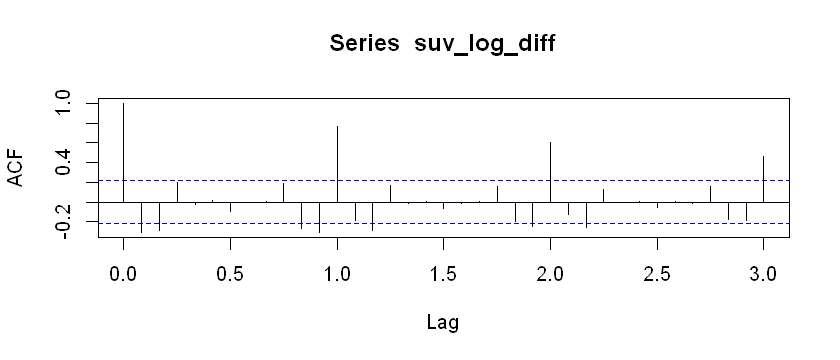

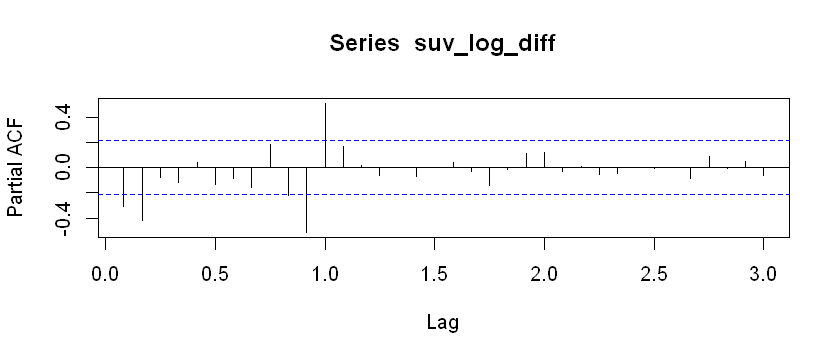

In [33]:
acf(suv_log_diff, lag.max=36)
pacf(suv_log_diff, lag.max=36)

Clearly at lag 12 we have high seasonality from PACF and ACF, try s=12 and D=1

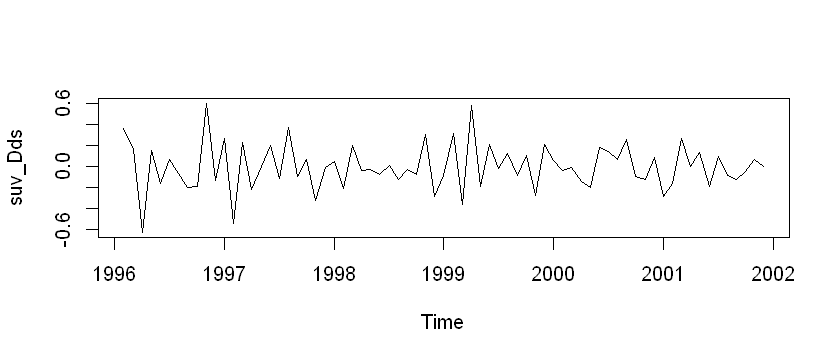

In [34]:
suv_Dds=diff(suv_log_diff,12)
plot(suv_Dds)

We assume above is stationary data assuming 1971 and 1972 spikes as outliers. We proceed with d=1(non-seasonal), D=1(seasonal) and s=12(seasonal)

In [35]:
Box.test(suv_Dds, lag=log(length(suv_Dds)))


	Box-Pierce test

data:  suv_Dds
X-squared = 20.097, df = 4.2627, p-value = 0.0006166


Ljung Box tells us that there is significant non zero autocorrelation left over. Hence we try further to model the suv_Dds process

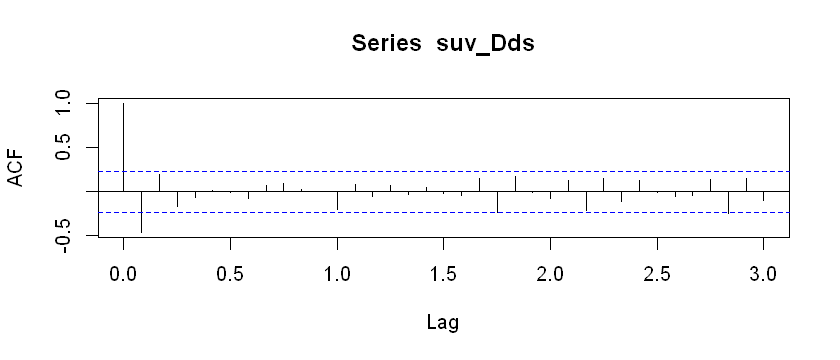

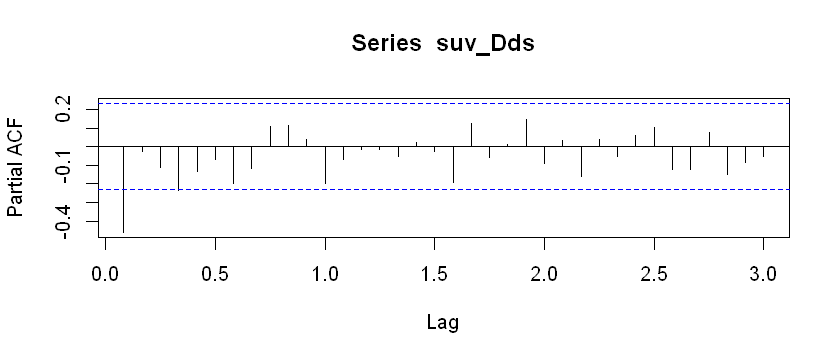

In [36]:
acf(suv_Dds, lag.max=36)
pacf(suv_Dds, lag.max=36)

The ACF tells us about MA:
<li>
we must have MA(q=1) <li>
we must also have seasonally (Q=0) (but we are not sure due to spikes in between so take 0,1,2,3 though 0,1 would have been enough)

The PACF tells us about AR: <LI>
we must have AR(p=0)         (take 0,1 as for safety) <Li>
we must also have seasonally (P=1) (taken as since period s=12)

In [37]:
d=1
DD=1
per=12
for(p in 1:2){
  for(q in 1:2){
    for(i in 1:2){
      for(j in 1:4){
        if(p+d+q+i+DD+j<=10){
          model<-arima(x=log(suv), order = c((p-1),d,(q-1)), seasonal = list(order=c((i-1),DD,(j-1)), period=per))
          pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
          sse<-sum(model$residuals^2)
          cat(p-1,d,q-1,i-1,DD,j-1,per, 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
        }
      }
    }
  }
}

0 1 0 0 1 0 12 AIC= -11.60664  SSE= 3.432906  p-VALUE= 0.0001365568 
0 1 0 0 1 1 12 AIC= -16.09179  SSE= 2.977559  p-VALUE= 3.149961e-05 
0 1 0 0 1 2 12 AIC= -17.58234  SSE= 2.301947  p-VALUE= 0.0002456512 
0 1 0 0 1 3 12 AIC= -16.41016  SSE= 2.35266  p-VALUE= 0.0003392286 
0 1 0 1 1 0 12 AIC= -13.43083  SSE= 3.214065  p-VALUE= 4.083829e-05 
0 1 0 1 1 1 12 AIC= -17.76362  SSE= 2.399748  p-VALUE= 0.0001916571 
0 1 0 1 1 2 12 AIC= -15.99095  SSE= 2.349898  p-VALUE= 0.0002477786 
0 1 0 1 1 3 12 AIC= -14.74777  SSE= 2.302025  p-VALUE= 0.0004504601 
0 1 1 0 1 0 12 AIC= -27.78538  SSE= 2.643277  p-VALUE= 0.1742485 
0 1 1 0 1 1 12 AIC= -34.54538  SSE= 2.233424  p-VALUE= 0.2730773 
0 1 1 0 1 2 12 AIC= -33.6145  SSE= 2.10948  p-VALUE= 0.2830601 
0 1 1 0 1 3 12 AIC= -32.19273  SSE= 1.87789  p-VALUE= 0.2700422 
0 1 1 1 1 0 12 AIC= -32.33191  SSE= 2.360508  p-VALUE= 0.2584528 
0 1 1 1 1 1 12 AIC= -34.0881  SSE= 1.842013  p-VALUE= 0.2843227 
0 1 1 1 1 2 12 AIC= -32.1017  SSE= 1.856336  p-VALUE= 0.2

## We finally choose (1,1,0,0,1,1,12)

initial  value -1.527727 
iter   2 value -1.675635
iter   3 value -1.682326
iter   4 value -1.682437
iter   5 value -1.682439
iter   5 value -1.682439
iter   5 value -1.682439
final  value -1.682439 
converged
initial  value -1.692103 
iter   2 value -1.704334
iter   3 value -1.707567
iter   4 value -1.707595
iter   5 value -1.707595
iter   5 value -1.707595
iter   5 value -1.707595
final  value -1.707595 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
          ar1     sma1
      -0.5017  -0.5107
s.e.   0.1013   0.1543

sigma^2 estimated as 0.03111:  log likelihood = 20.49,  aic = -34.99

$degrees_of_freedom
[1] 69

$ttable
     Estimate     SE t.value p.value
ar1   -0.5017 0.1013 -4.9531  0.0000
sma1  -0.5107 0.1543 -3.3098  0.0015

$AIC
[1] -0.4266973

$AICc
[1] -0.4248449

$BIC
[1] -0.3439164


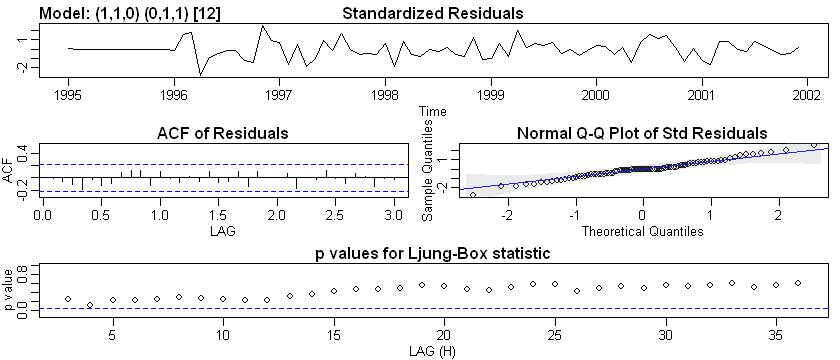

In [38]:
library(astsa)
sarima(log(suv),1,1,0,0,1,1,12)

The ACF plot, QQ plot and Box stat for residuals indicate that this residuals are normal. We can also calculate the coefficients for our chosen model using:

In [39]:
model<-arima(x=log(suv), order = c(1,1,0), seasonal = list(order=c(0,1,1), period=12))
model


Call:
arima(x = log(suv), order = c(1, 1, 0), seasonal = list(order = c(0, 1, 1), 
    period = 12))

Coefficients:
          ar1     sma1
      -0.5017  -0.5107
s.e.   0.1013   0.1543

sigma^2 estimated as 0.03111:  log likelihood = 20.49,  aic = -34.99

Estimated model:<br><h2><Center>𝑋<sub>𝑡</sub>=suv_sales <br><br>
𝑌<sub>𝑡</sub>=log𝑋<sub>𝑡</sub> <br><br>
(1−Φ𝐵)(1−𝐵)(1−𝐵<sup>12</sup>)𝑌<sub>𝑡</sub>=(1+𝜃𝐵<sup>12</sup>)𝑍<sub>𝑡</sub><br><br>
    Φ=-0.5017, 𝜃=-0.5107 <br><br>
    𝑍<sub>𝑡</sub>~𝑁𝑜𝑟𝑚𝑎𝑙(0,0.0311)
    

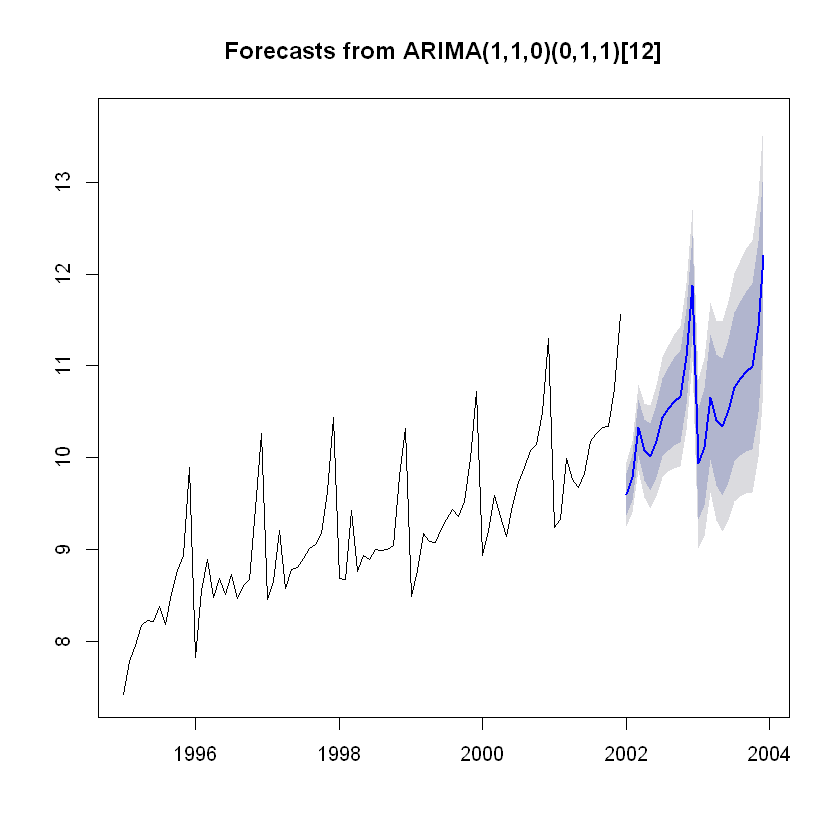

In [40]:
library(forecast)
#default IKernel plot size set
options(repr.plot.width=7, repr.plot.height=7)           
plot(forecast(model))

In [41]:
forecast(model)

         Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
Jan 2002       9.600019  9.373967  9.826071  9.254303  9.945736
Feb 2002       9.786505  9.533944 10.039066  9.400246 10.172764
Mar 2002      10.329605 10.025423 10.633786  9.864399 10.794810
Apr 2002      10.081973  9.746705 10.417240  9.569225 10.594720
May 2002      10.008096  9.638604 10.377587  9.443007 10.573184
Jun 2002      10.181170  9.783094 10.579245  9.572365 10.789974
Jul 2002      10.439372 10.013362 10.865383  9.787845 11.090900
Aug 2002      10.534857 10.083237 10.986477  9.844164 11.225551
Sep 2002      10.613026 10.136886 11.089165  9.884833 11.341218
Oct 2002      10.664526 10.165207 11.163846  9.900883 11.428170
Nov 2002      11.096784 10.575248 11.618321 10.299163 11.894406
Dec 2002      11.877167 11.334355 12.419979 11.047007 12.707327
Jan 2003       9.932756  9.330373 10.535139  9.011491 10.854022
Feb 2003      10.112194  9.475681 10.748707  9.138731 11.085657
Mar 2003      10.658829  9.980844 11.336

# SUMMARY

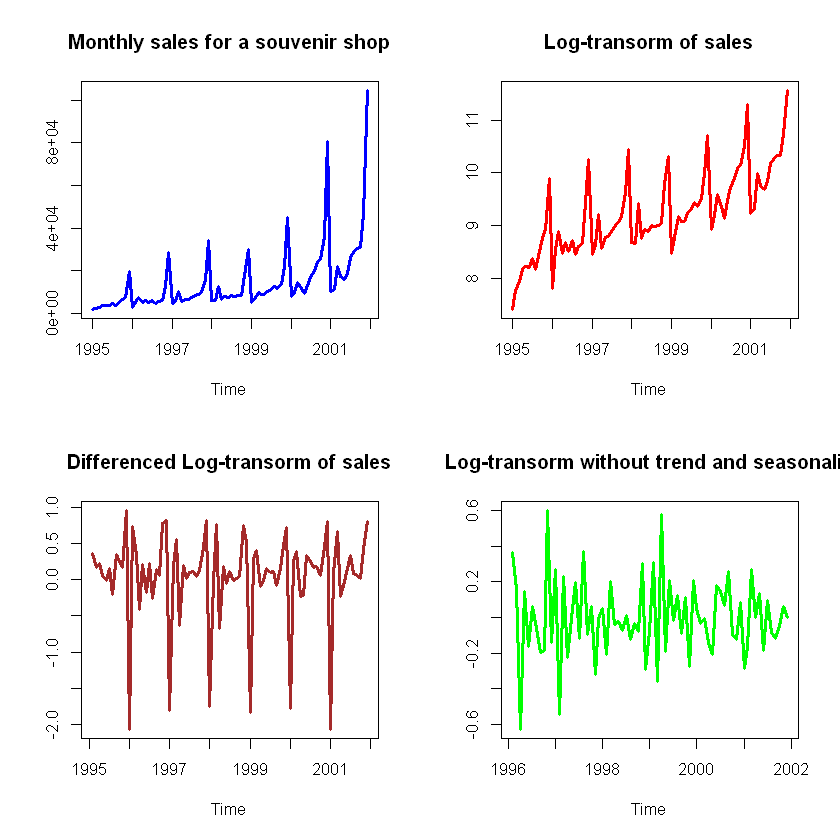

In [42]:
par(mfrow=c(2,2))

plot(suv, main='Monthly sales for a souvenir shop', ylab='', col='blue', lwd=3)
plot(log(suv), main='Log-transorm of sales', ylab='', col='red', lwd=3)
plot(diff(log(suv)), main='Differenced Log-transorm of sales', ylab='', col='brown', lwd=3)
plot(diff(diff(log(suv)),12), main='Log-transorm without trend and seasonaliy', ylab='', col='green', lwd=3)

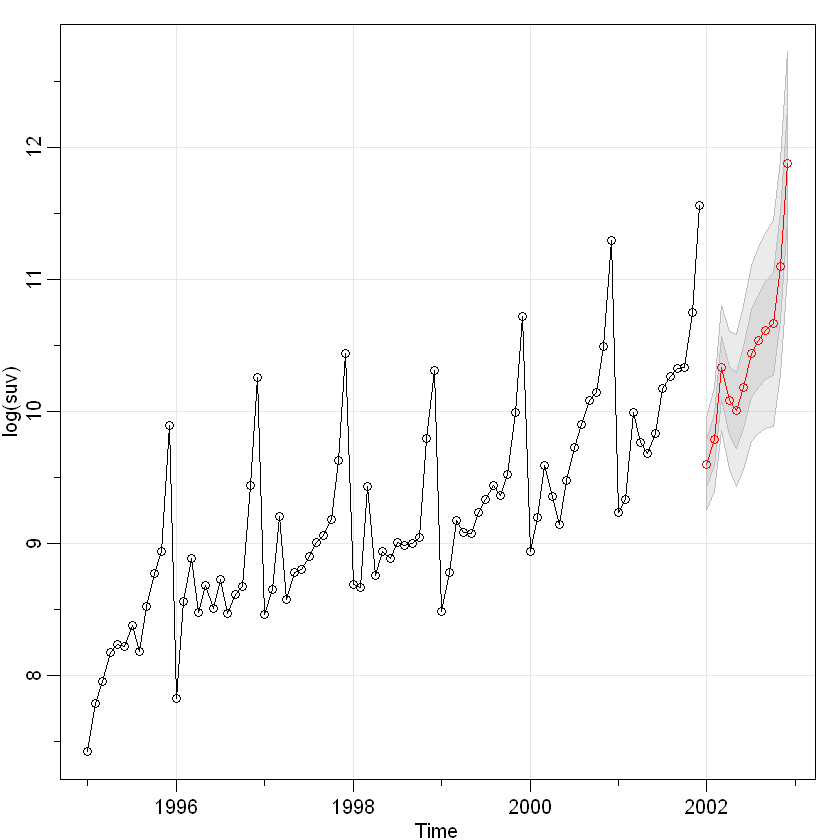

In [44]:
a<-sarima.for(log(suv),12,1,1,0,0,1,1,12)

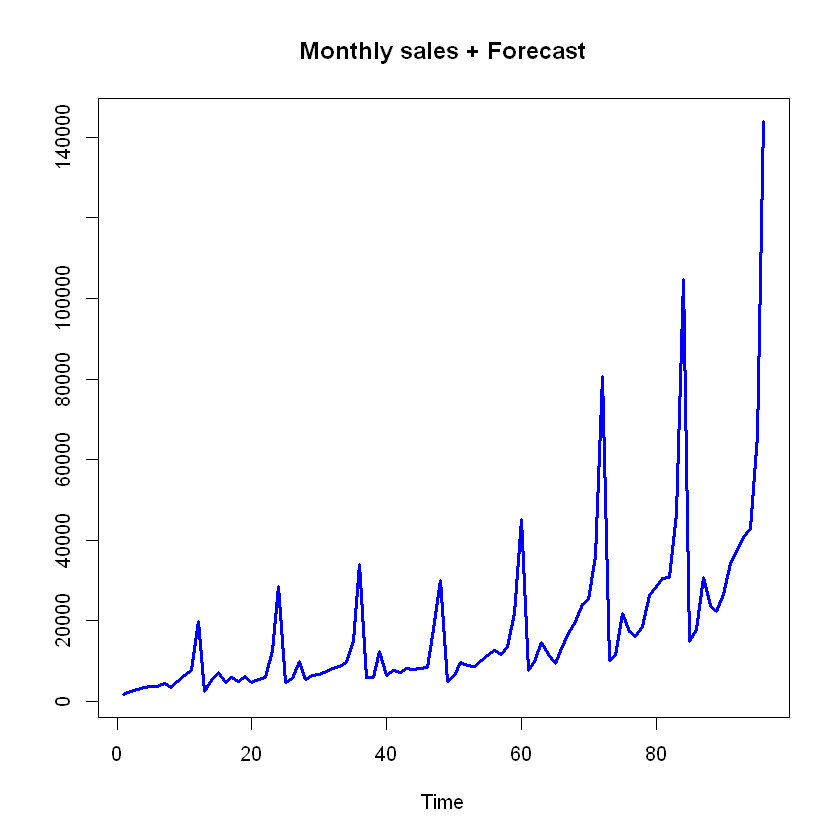

In [45]:
plot.ts(c(suv,exp(a$pred)), main='Monthly sales + Forecast', ylab='', col='blue', lwd=3)